36 36 36


''

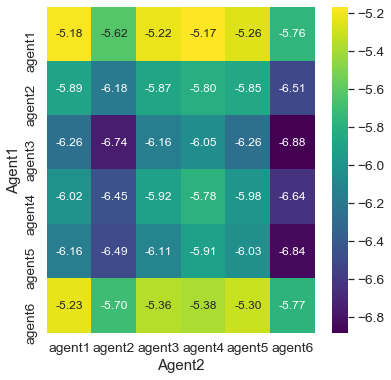

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
with open('result.json','r') as f:
    jd =json.load(f)
    jdk = jd.keys()
    aid1 = []
    aid2 = []
    reward = []
    for a1 in jdk:
        jdk2 = jd[a1].keys()
        for a2 in jdk2:
            aid1.append(a1)
            aid2.append(a2)
            reward.append(jd[a1][a2])
print(len(aid1),len(aid2),len(reward))
adhoc = dict(Agent1=aid1,Agent2=aid2,AvgReward=reward)
reward = pd.DataFrame(adhoc)
rewards = reward.pivot("Agent1", "Agent2",'AvgReward')
#rewards = rewards[['1', '2', '3', '4', '5', '6']]
#rewards.index = pd.CategoricalIndex(rewards.index, categories= ['1', '2', '3', '4', '5', '6'])
rewards.sort_index(axis=0,level=0, inplace=True)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.25)
ax = sns.heatmap(rewards, annot=True, fmt='.2f', cmap='viridis',annot_kws={'size':12})

#plt.savefig('adhoc.jpg', bbox_inches='tight', pad_inches=0,dpi=300)
''''''

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

with open('experiment.json','r') as f:
    jd =json.load(f)
    jdk = list(jd.keys())
    aid1 = []
    aid2 = []
diffs = []
for k1 in jdk:
    qs1 = jd[k1]['q']
    qs1 = np.array(qs1)
    qs1 /= np.max(qs1, axis=1, keepdims=True)
    qs1[qs1!=1] = 0
    for k2 in jdk:
        qs2 = jd[k2]['q']
        qs2 = np.array(qs2)
        qs2 /= np.max(qs2, axis=1, keepdims=True)
        qs2[qs2!=1] = 0
        diff = np.sum(abs(np.array(qs1)-np.array(qs2)))
        if k1 == '0':
            aid1.append('1')
        else:
            aid1.append(k1)
        if k2 == '0':
            aid2.append('1')
        else:
            aid2.append(k2)
        diffs.append(diff)
diffs = np.reshape(diffs,(-1))
print(np.shape(diffs))
print(len(aid1),len(aid2),len(diffs))
adhoc = dict(Agent1=aid1,Agent2=aid2,Diff=diffs)
reward = pd.DataFrame(adhoc)
rewards = reward.pivot("Agent1", "Agent2",'Diff')
rewards = rewards[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']]
rewards.index = pd.CategoricalIndex(rewards.index, categories= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
rewards.sort_index(axis=0,level=0, inplace=True)
plt.figure(figsize=(11, 11))
sns.set(font_scale=1.4)
ax = sns.heatmap(rewards, cmap='viridis',annot_kws={'size':14})
plt.savefig('diff.jpg', bbox_inches='tight', pad_inches=0,dpi=300)